In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os


In [ ]:
os.chdir(r'/content/drive/MyDrive/project')

In [ ]:
df=pd.read_csv('Transformations_output.csv')

In [ ]:
df.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,Zipcode,Timezone,Temperature(F),...,Stop,Sunrise_Sunset,Year,MonthC,Month,Day,WeekdayC,Weekday,Hour,Time Duration (min)
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,Dublin,43017,US/Eastern,42.1,...,False,Night,2016,Feb,2,8,Mon,1,0,360.0
1,3,39.172393,-84.492792,39.170476,-84.501798,0.500,Cincinnati,45217,US/Eastern,37.0,...,False,Day,2016,Feb,2,8,Mon,1,7,360.0
2,2,41.375310,-81.820170,41.367860,-81.821740,0.521,Cleveland,44130,US/Eastern,33.1,...,False,Day,2016,Feb,2,8,Mon,1,11,360.0
3,2,40.109310,-82.968490,40.110780,-82.984000,0.826,Westerville,43081,US/Eastern,32.0,...,False,Day,2016,Feb,2,8,Mon,1,15,360.0
4,2,39.192880,-84.477230,39.196150,-84.473350,0.307,Cincinnati,45216,US/Eastern,33.8,...,False,Day,2016,Feb,2,8,Mon,1,15,360.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554549 entries, 0 to 3554548
Data columns (total 34 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Severity             int64  
 1   Start_Lat            float64
 2   Start_Lng            float64
 3   End_Lat              float64
 4   End_Lng              float64
 5   Distance(mi)         float64
 6   City                 object 
 7   Zipcode              int64  
 8   Timezone             object 
 9   Temperature(F)       float64
 10  Wind_Chill(F)        float64
 11  Humidity(%)          float64
 12  Pressure(in)         float64
 13  Wind_Direction       object 
 14  Wind_Speed(mph)      float64
 15  Precipitation(in)    float64
 16  Weather_Condition    object 
 17  Amenity              bool   
 18  Bump                 bool   
 19  Crossing             bool   
 20  Junction             bool   
 21  No_Exit              bool   
 22  Railway              bool   
 23  Station              bool   
 24

In [ ]:
df.shape

(3554549, 34)

In [ ]:
df.isnull().sum()

Severity               0
Start_Lat              0
Start_Lng              0
End_Lat                0
End_Lng                0
Distance(mi)           0
City                   0
Zipcode                0
Timezone               0
Temperature(F)         0
Wind_Chill(F)          0
Humidity(%)            0
Pressure(in)           0
Wind_Direction         0
Wind_Speed(mph)        0
Precipitation(in)      0
Weather_Condition      0
Amenity                0
Bump                   0
Crossing               0
Junction               0
No_Exit                0
Railway                0
Station                0
Stop                   0
Sunrise_Sunset         0
Year                   0
MonthC                 0
Month                  0
Day                    0
WeekdayC               0
Weekday                0
Hour                   0
Time Duration (min)    0
dtype: int64

**EDA**

Considering columns that seems to affect the road accidents more directly

City

Start Lat and Long

Temperature

Weather Condition

In [ ]:
cities = df.City.unique()
len(cities)

10327

In [ ]:
cities_by_accidents = df.City.value_counts().sort_values(ascending = False)
cities_by_accidents

Miami                           142575
Los Angeles                      79444
Orlando                          74911
Dallas                           50074
Houston                          46197
                                 ...  
Chetek                               1
Leary                                1
Nooksack                             1
Selby                                1
American Fork-Pleasant Grove         1
Name: City, Length: 10327, dtype: int64

Miami, Houston, Los Angeles, Charlotte, Dallas are some

of the cities with highest no. of accidents reccorded

In [ ]:
cities_by_accidents.head(20)



Miami          142575
Los Angeles     79444
Orlando         74911
Dallas          50074
Houston         46197
Charlotte       40228
San Diego       32473
Raleigh         31438
Nashville       28555
Sacramento      28421
Baton Rouge     26963
Minneapolis     26649
Austin          25101
Richmond        22524
New Orleans     22323
Phoenix         21595
Tucson          21094
Atlanta         20652
Portland        20343
Saint Paul      19374
Name: City, dtype: int64

Showing Top 50 cities with highest no. of accidents

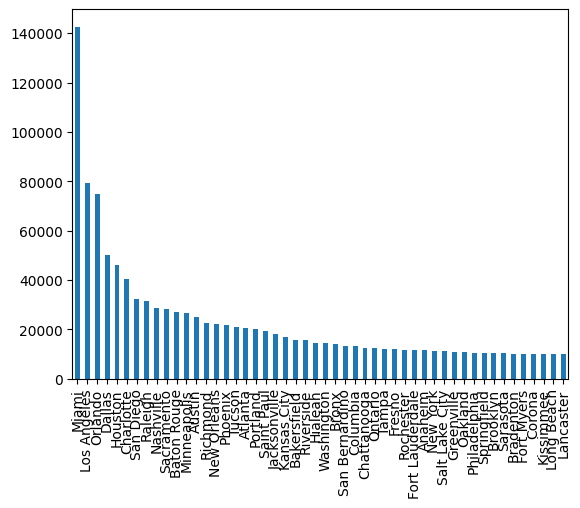

<Figure size 2800x60000 with 0 Axes>

In [ ]:
cities_by_accidents[:50].plot(kind = 'bar');
plt.figure(figsize =(28,600));

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-17-4950b78a6493>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accidents);


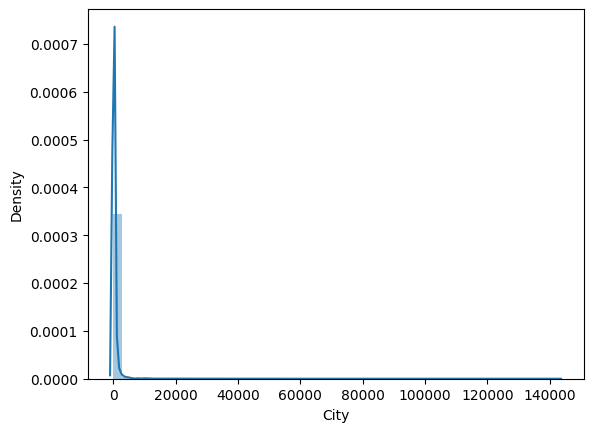

In [ ]:
sns.distplot(cities_by_accidents);

In [ ]:
high_accident_cities = cities_by_accidents[cities_by_accidents >=1000];
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000];

In [ ]:
print("No. of cities with high accidents are {}".format(len(high_accident_cities)))
print("Percentage of cities with high accidents are {}".format((len(high_accident_cities)/len(cities))*100))
print("No. of cities with low accidents are {}".format(len(low_accident_cities)))
print("Percentage of cities with low accidents are {}".format((len(low_accident_cities)/len(cities))*100))

No. of cities with high accidents are 616
Percentage of cities with high accidents are 5.964946257383557
No. of cities with low accidents are 9711
Percentage of cities with low accidents are 94.03505374261644


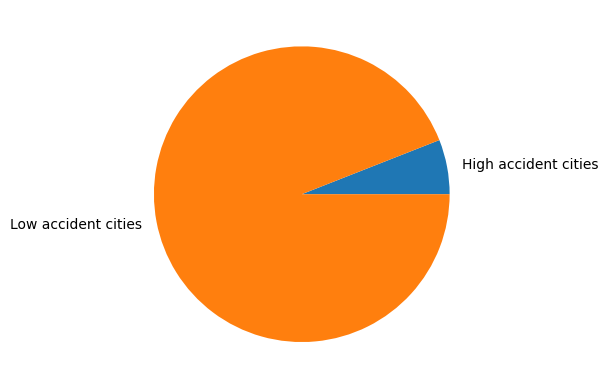

In [ ]:
High_accident_zone = (len(high_accident_cities)/len(cities))*100
Low_accident_zone = (len(low_accident_cities)/len(cities))*100
y = np.array([High_accident_zone,Low_accident_zone])
mylabels = np.array(["High accident cities", "Low accident cities"])
plt.pie(y, labels = mylabels);
plt.show()

Percentage of cities with high accidents are 5.964946257383557 Percentage of cities with low accidents are 94.03505374261644

Here,High accidents means no.of accidents more than 1000 in the 7 years and Low accidents means no.of accidents less than 1000 in the 7 years(2016-2023)

**2. Time and Day Factor in Accidents**

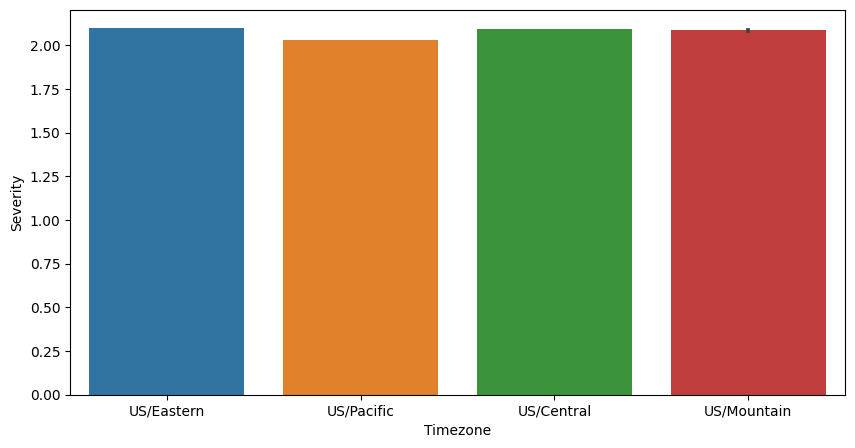

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(y = 'Severity', x = 'Timezone', data = df)
plt.show()

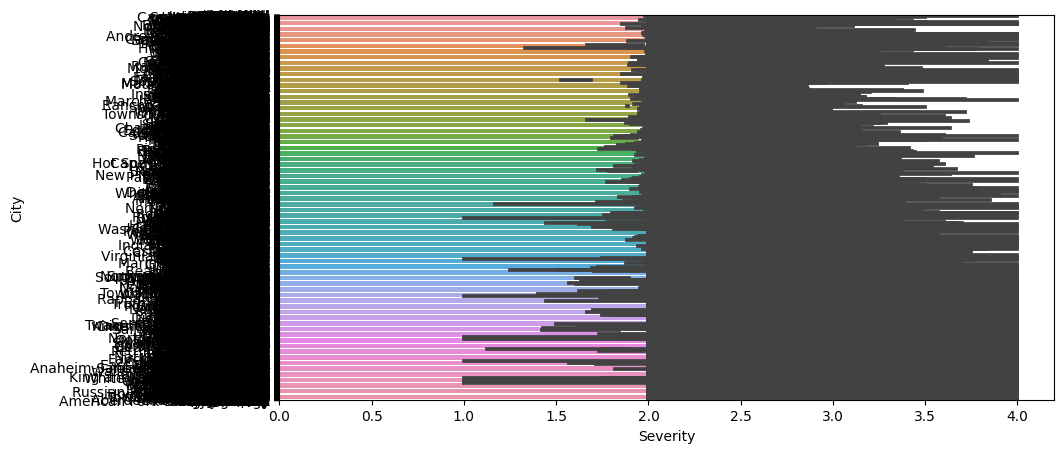

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(y = 'City', x = 'Severity', data = df)
plt.show()

In [ ]:
# To get the hour of day (in 24hr clock system) in which accident took place

df.Hour

0           0
1           7
2          11
3          15
4          15
           ..
3554544    18
3554545    19
3554546    19
3554547    19
3554548    18
Name: Hour, Length: 3554549, dtype: int64

In [ ]:
df.Start_Time = pd.to_datetime(df.Hour)
df.Start_Time[0]

<ipython-input-27-442b50a2a21c>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Start_Time = pd.to_datetime(df.Hour)


Timestamp('1970-01-01 00:00:00')

Text(0, 0.5, 'No. of Accidents')

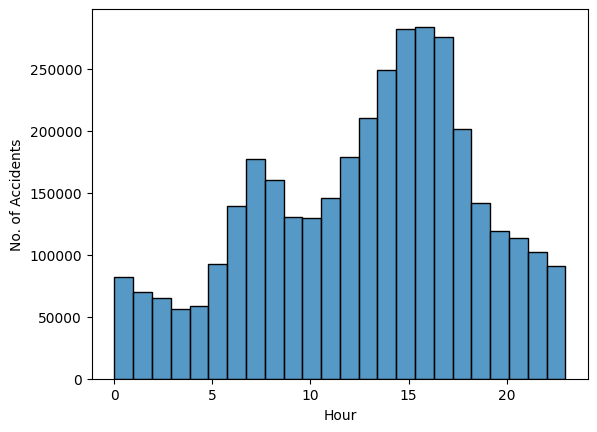

In [ ]:
#A plot to show no. of accidents that took place in a specific time of 24 hrs clock

sns.histplot(df.Hour, bins=24);
import matplotlib.pyplot as plt
plt.xlabel("Hour")
plt.ylabel("No. of Accidents")

Max no of accidents are in the morning (6am -8am) and in evening (3pm -6pm). May be because it is the peak hour of the day as most people go out and return home from work place in this time only

Text(0, 0.5, 'No. of Accidents')

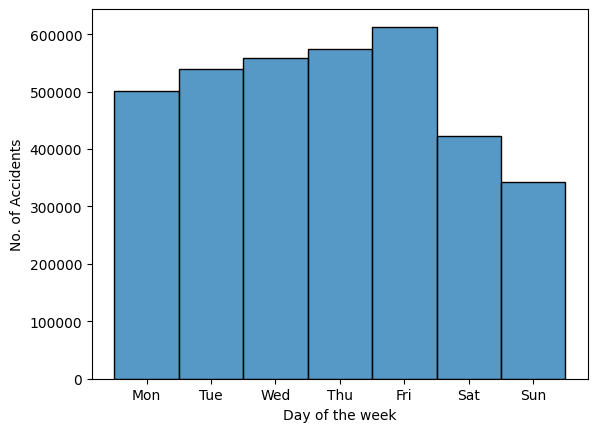

In [ ]:
# A plot to show no. of accidents that took place in a specific day of a week.

sns.histplot(df.WeekdayC, bins=7);
import matplotlib.pyplot as plt
plt.xlabel("Day of the week")
plt.ylabel("No. of Accidents")

Weekends have less accidents alsmost half of the average weekdays accidents.

In [ ]:
WeekdayC=df.WeekdayC.unique()

<ipython-input-52-cec55778a075>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Sunday_distribution = sns.distplot(df.Hour, bins= 24,)


Text(0, 0.5, 'No. of Accidents')

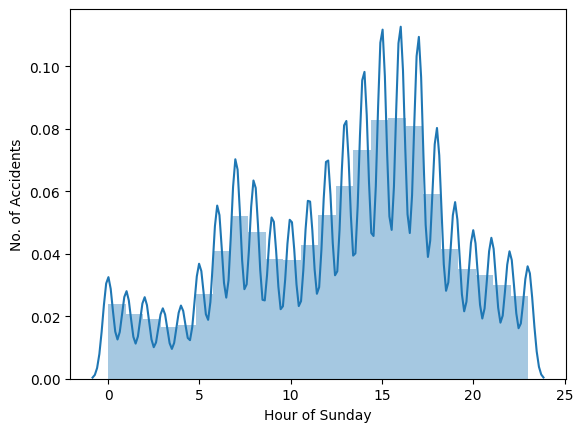

In [ ]:
#Viewing hourly distribution for sunday
import matplotlib.pyplot as plt
For_sunday = [df.Weekday == 6]
Sunday_distribution = sns.distplot(df.Hour, bins= 24,)
plt.xlabel("Hour of Sunday")
plt.ylabel("No. of Accidents")

**3. Weather condition factor for Accidents**

In [ ]:
df['Weather_Condition'].value_counts()                     #Total accidents given corresponding to each weather condition

Fair                                   1697787
Cloudy                                  524654
Mostly Cloudy                           457519
Partly Cloudy                           311743
Light Rain                              164310
                                        ...   
Heavy Sleet / Windy                          1
Heavy Ice Pellets                            1
Light Rain Shower / Windy                    1
Light Thunderstorms and Snow                 1
Heavy Thunderstorms with Small Hail          1
Name: Weather_Condition, Length: 122, dtype: int64

In [ ]:
weather = df['Weather_Condition'].value_counts().sort_values(ascending = False).head(15)
weather

Fair                       1697787
Cloudy                      524654
Mostly Cloudy               457519
Partly Cloudy               311743
Light Rain                  164310
Light Snow                   78648
Fog                          54955
Rain                         38659
Haze                         34003
Fair / Windy                 25211
Heavy Rain                   15122
Thunder in the Vicinity      11984
Cloudy / Windy               11468
Mostly Cloudy / Windy        11312
T-Storm                      10322
Name: Weather_Condition, dtype: int64

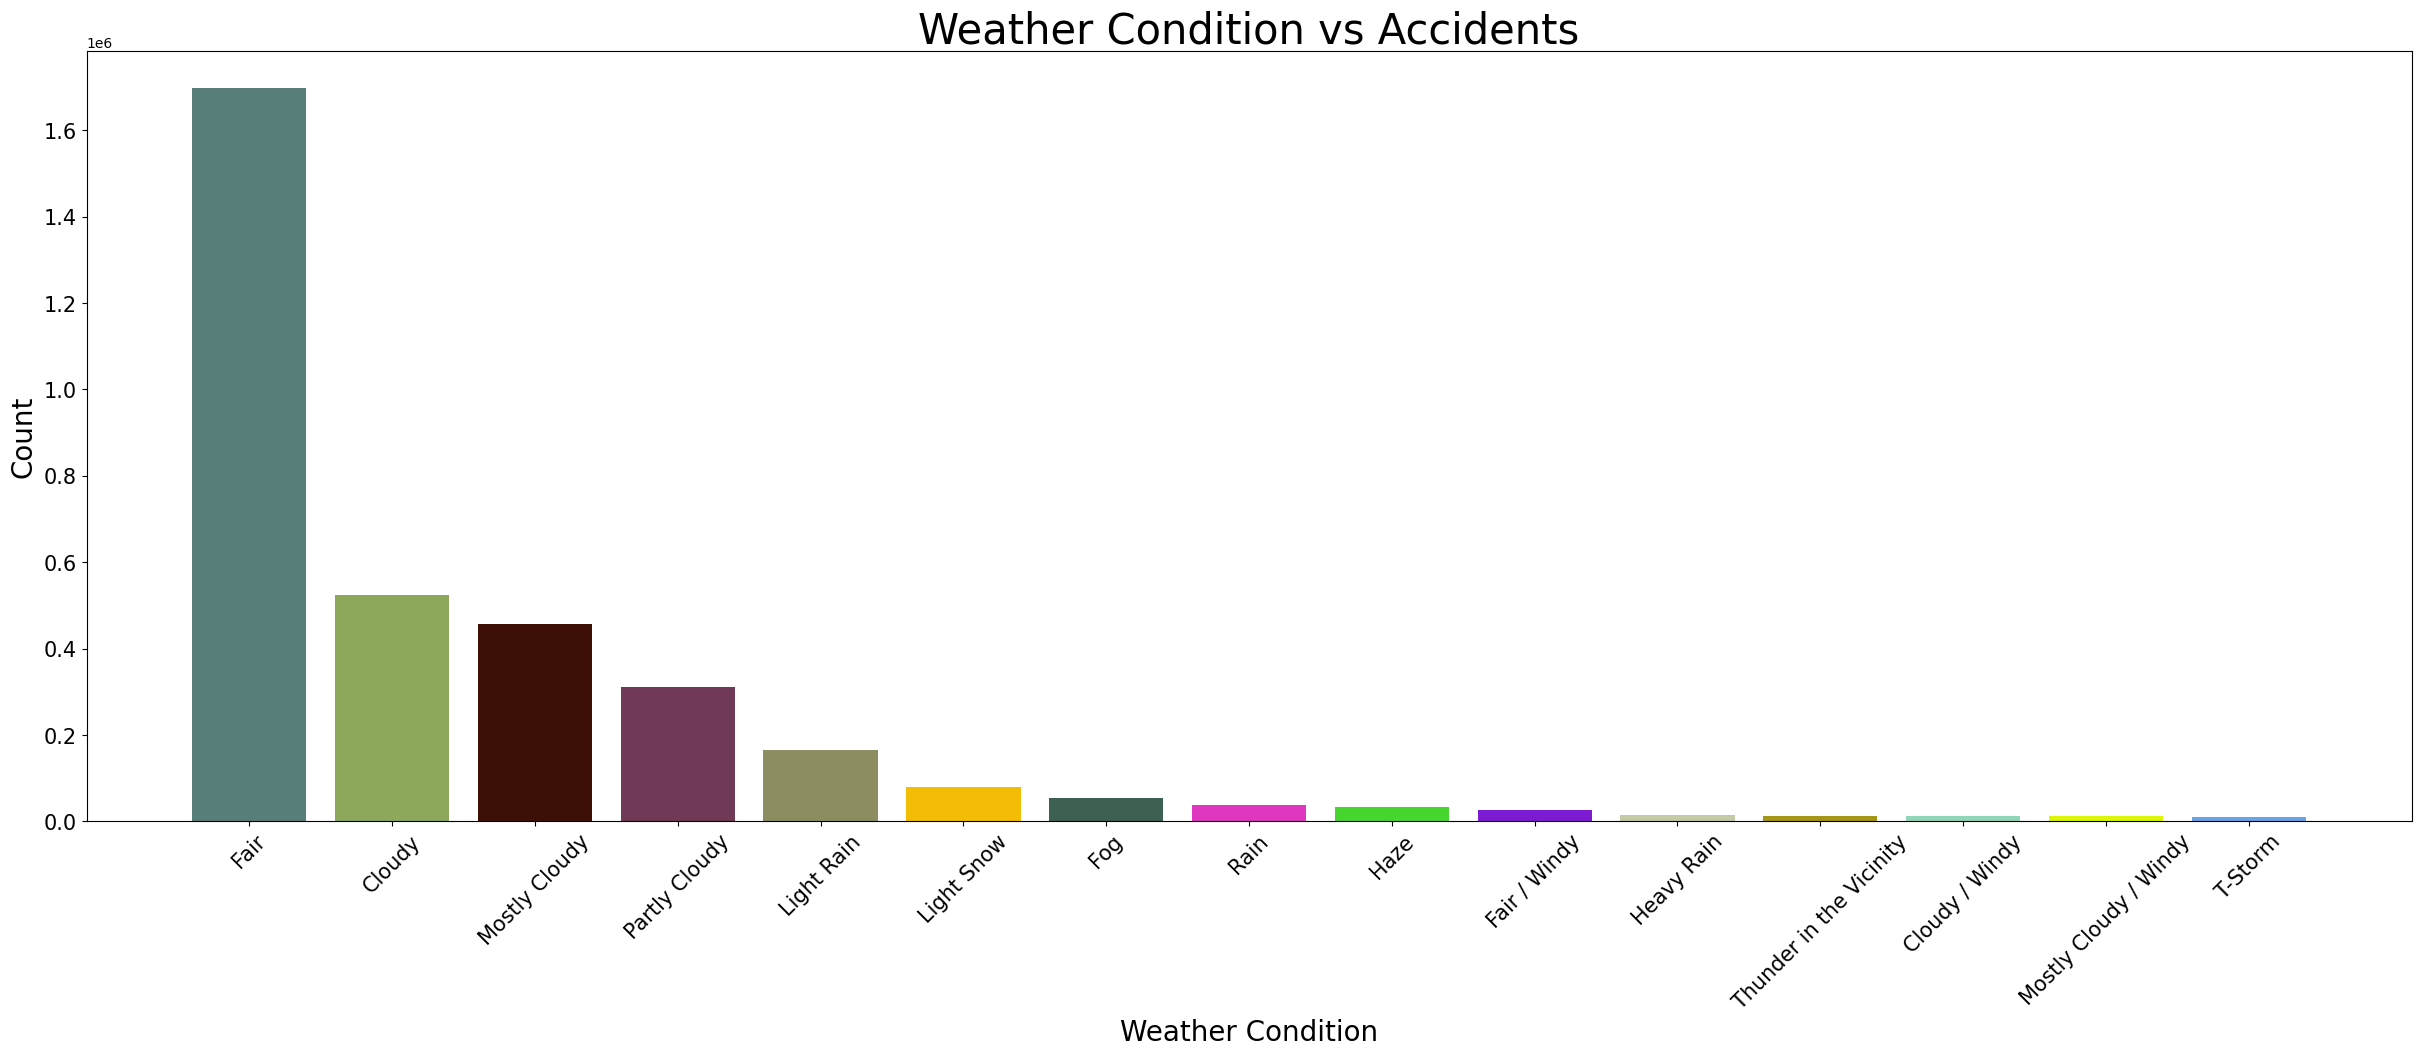

In [ ]:
import random
figsize = (30, 10)

Accident_Counts = weather.values
Weather_Conditions = weather.index
def generate_random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

bar_colors = [generate_random_color() for _ in range(len(Weather_Conditions))]

plt.figure(figsize=figsize)

plt.bar(Weather_Conditions, Accident_Counts, color=bar_colors)
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Weather Condition", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Weather Condition vs Accidents", fontsize = 30)

plt.show()


Most of the accidents have taken place in Fair, cloudy and clear day. Very less accident on rainy, foggy days. Probably because people travel more in clear, fair days and travel less in rainy days

**4.Temperature Factor in Accidents**

Seeing no. of accidents corresponding to particular temperature

In [ ]:

df["Temperature(F)"]

0          42.1
1          37.0
2          33.1
3          32.0
4          33.8
           ... 
3554544    86.0
3554545    70.0
3554546    73.0
3554547    71.0
3554548    79.0
Name: Temperature(F), Length: 3554549, dtype: float64

In [ ]:
df_temp = (df["Temperature(F)"] -32)*5/9
a = df_temp.value_counts().sort_values(ascending=False)
a

 22.777778    82761
 25.000000    78073
 22.222222    77695
 23.888889    76750
 21.111111    75366
              ...  
-17.000000        1
 4.277778         1
-6.388889         1
-0.277778         1
-9.277778         1
Name: Temperature(F), Length: 332, dtype: int64

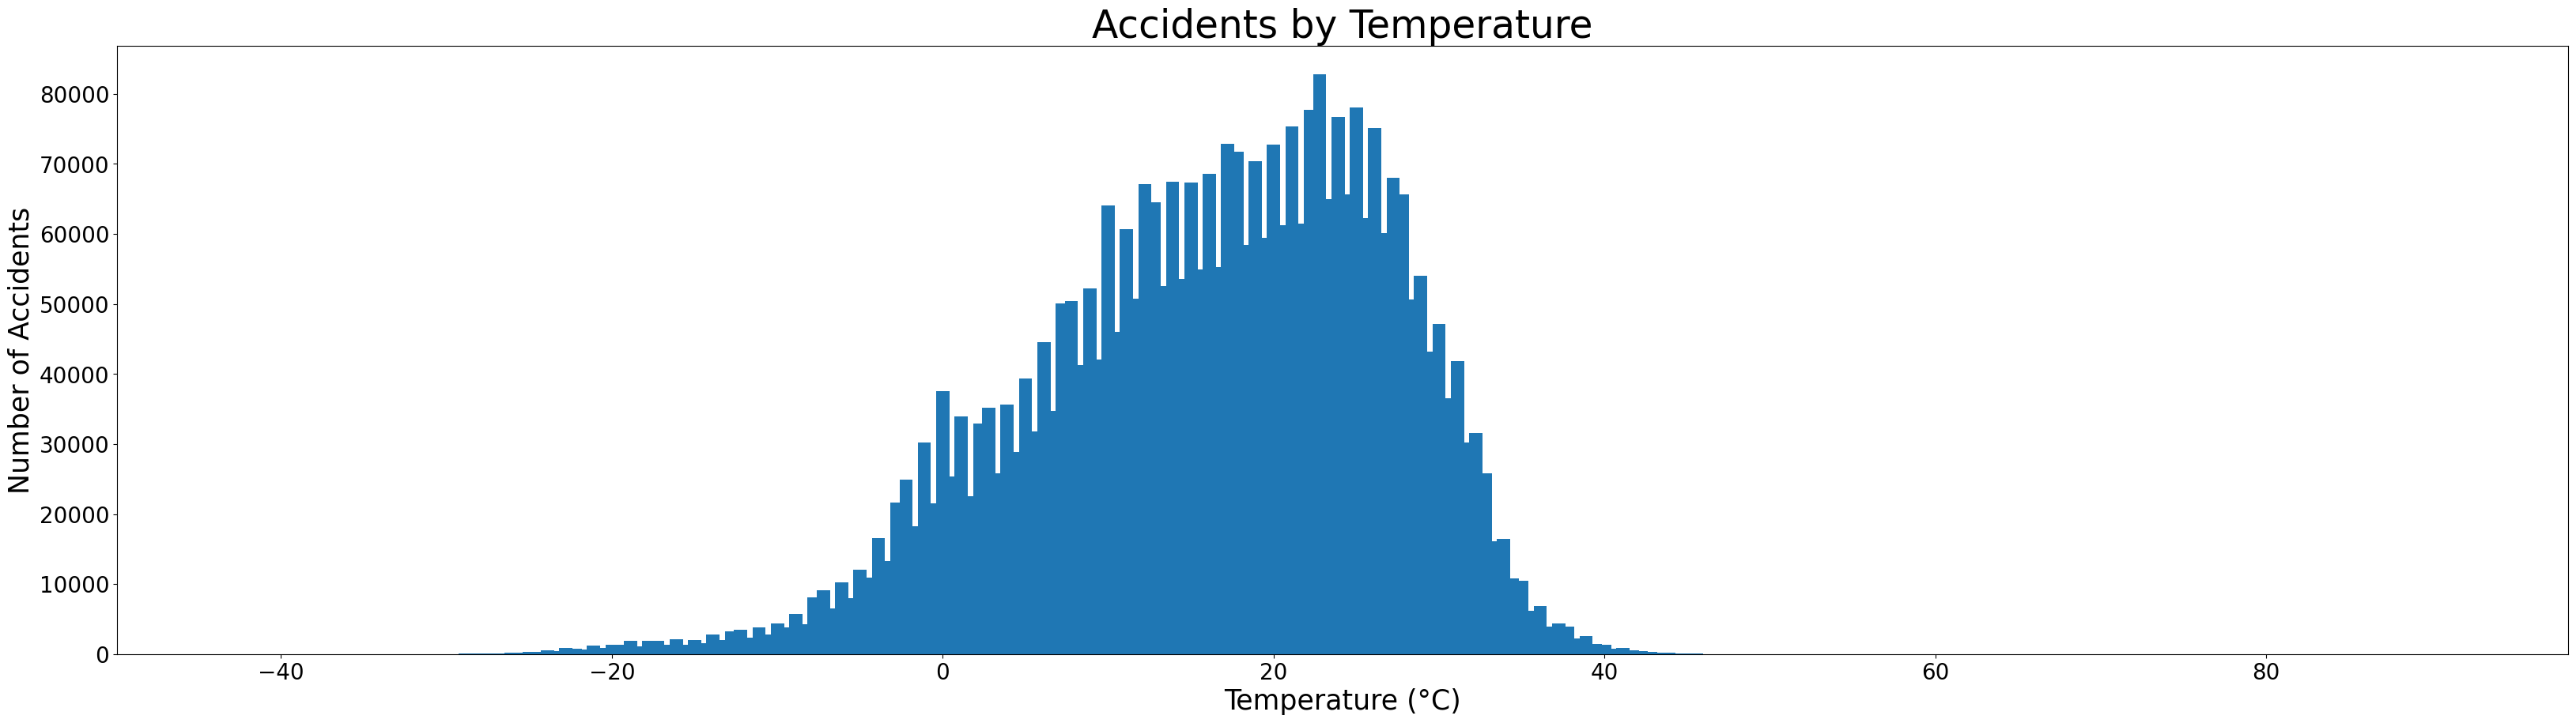

In [ ]:
figsize = (40, 10)

temp_list = a.index
accident_list = a.values
plt.figure(figsize=figsize)

plt.bar(temp_list, accident_list)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Temperature (°C)", fontsize = 25)
plt.ylabel("Number of Accidents",fontsize = 25)
plt.title("Accidents by Temperature", fontsize = 35)

plt.show()

Majority of the accidents have taken place between 10 degree to 30 degree celcius temperature.

#  5.Longitude and Latitude with Accidents Density

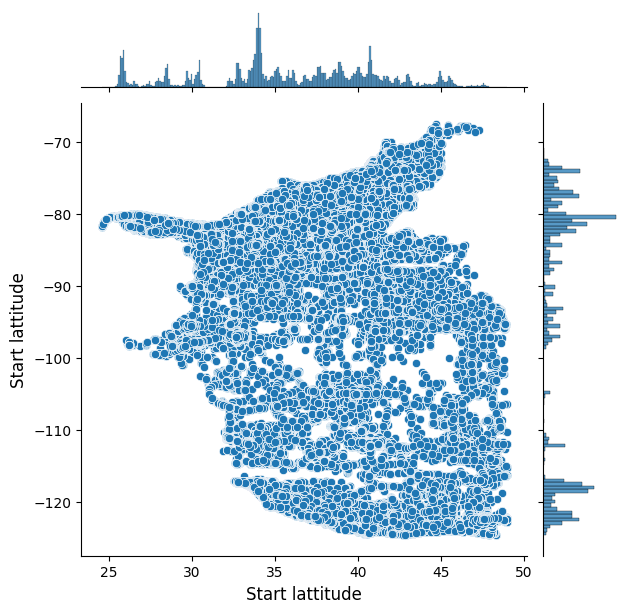

In [ ]:
df_num=df.select_dtypes(np.number)
sns.jointplot(x=df_num.Start_Lat.values , y=df_num.Start_Lng.values,height=6)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()

# Summary and Conclusion

*   New York city is not present in the dataset.

*   Miami, Houston, Los Angeles, Charlotte, Dallas are some
    
    of the cities with highest no. of accidents reccorded.

*   No. of cities with high accidents are 616, ie only 5.96%

*   No. of cities with low accidents are 9711 ie. only 94.03%

*  Max no of accidents are in the morning (6am -8am) and in evening (3pm -6pm).May be because it is the peak hour of the day as most people go out and return home from work place in this time only.



*  Weekends have less accidents alsmost half of the average
   weekdays accidents.

*  Clearly no. of accidents in sunday is more between the    
   time 11am to 6pm.

*  Maybe people start their day late during on sunday

















